# Agglomerative Clustering
Data : ilustrasi k means.csv
- Plot data using scatter plot
- Make dendrograms
    - ward linkage
    - average linkage
    - complete linkage
- Compare the result
    - is it different?
    - what about another data?
- Plot the data and clustering result (optimal number of the cluster from ward, average, and complete) using scatter plot

> ## Library

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [2]:
X = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\9. Unsupervised Learning\ilustrasi k means.csv', sep = ';')
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


> ## Data Visualization

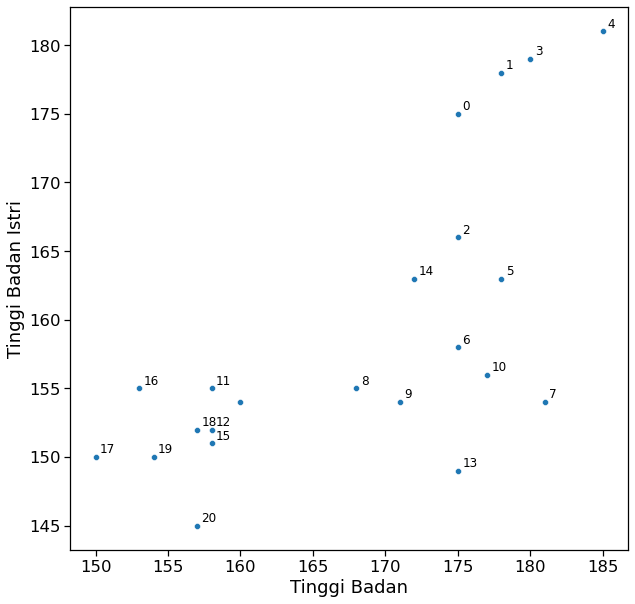

In [7]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(x = 'tinggibadan', y = 'tinggibadanistri', data = X)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,X.shape[0]-1)):
    plt.annotate(txt, (X['tinggibadan'][i]+0.3, X['tinggibadanistri'][i]+0.3), fontsize = 12)
plt.show()

> ## Dendrogram : Ward

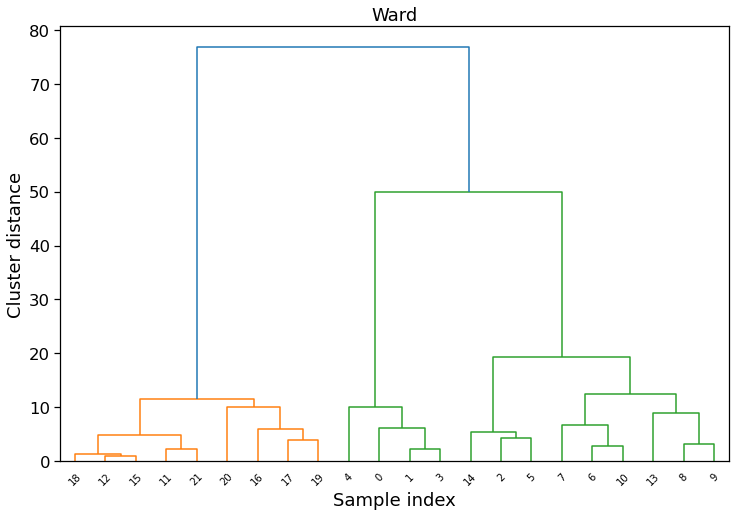

In [14]:
linkage_array = ward(X)

plt.figure(figsize=(12, 8))

dendrogram(linkage_array)

plt.title('Ward')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

branch position :
- 2 clusters distance = 77
- 3 clusters distance = 50
- 4 clusters distance = 20
- 5 clusters distance = 12

distance criteria :
- too high : problem between data in same cluster
- too low : between cluster still similiar

calculate distance different between cluster:
- 2 to 3 : 27
- 3 to 4 : **30** (choose the highest different)
- 4 to 5 : 8

> ## Dendrogram : Average

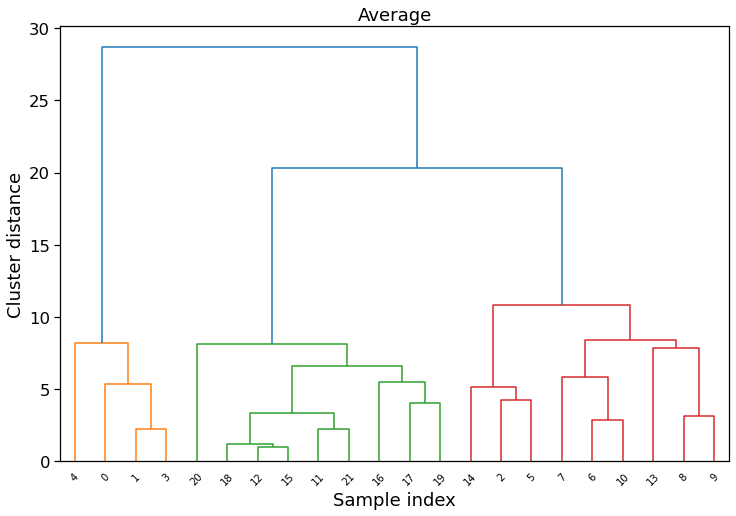

In [16]:
linkage_array = average(X)

plt.figure(figsize=(12, 8))

dendrogram(linkage_array)

plt.title('Average')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

> ## Dendrogram : Complete

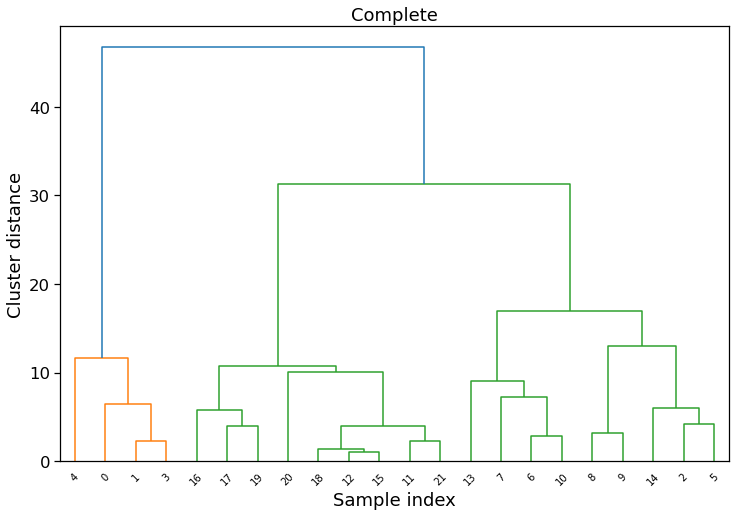

In [17]:
linkage_array = complete(X)

plt.figure(figsize=(12, 8))

dendrogram(linkage_array)

plt.title('Complete')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

> ## Result Comparison

In [18]:
clus_ward = AgglomerativeClustering(linkage = 'ward', n_clusters = 3)
X['ward'] = clus_ward.fit_predict(X)

clus_avg = AgglomerativeClustering(linkage = 'average', n_clusters = 3)
X['average'] = clus_avg.fit_predict(X)

clus_complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
X['complete'] = clus_complete.fit_predict(X)

In [19]:
X

,tinggibadan,tinggibadanistri,ward,average,complete
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


> ## Clustering Result

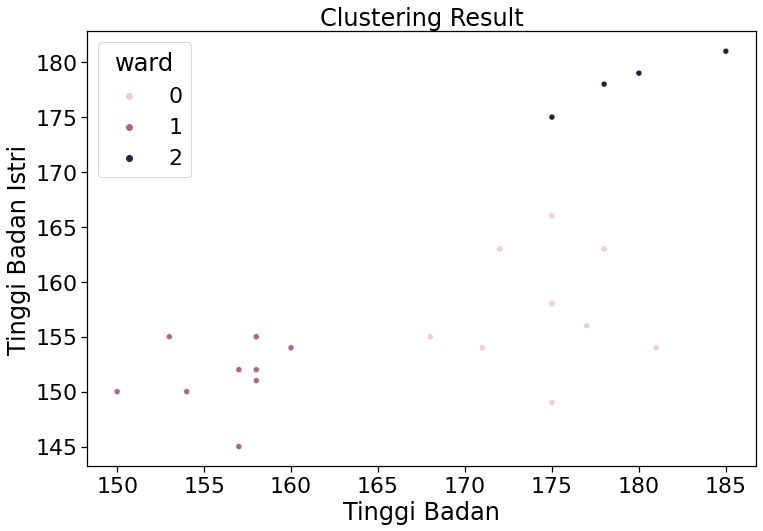

In [20]:
plt.figure(figsize = (12,8))

sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(x = 'tinggibadan', y = 'tinggibadanistri',hue = 'ward', data = X)

plt.title('Clustering Result')
plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')
plt.show()